## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

In [2]:
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
LINK = 'https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv'
data = pd.read_csv(filepath_or_buffer=LINK)
display(data.head())
print('\n', '+' * 105, '\n')
display(data.tail())
print(f'Число строк = {data.shape[0]}\nЧисло столбцов = {data.shape[1]}')

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good



 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


Число строк = 1000
Число столбцов = 21


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
# Проверим, есть ли пропуски именно типа "NaN"

data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [5]:
# Пропусков типа NaN нет нигде. Ок, проверим каждую колонку с помощью .value_counts, мб обнаружим необычные значения. 


In [6]:
for column in data.columns:
    print(f'Column considered: {column}')
    display(data[column].value_counts())
    print('\n', '+' * 100, '\n')
    

Column considered: status


... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: duration


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: credit_history


no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: purpose


furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                 9
Name: purpose, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: amount


1262    3
1258    3
1478    3
1275    3
1393    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: amount, Length: 923, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: savings


unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: employment_duration


1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: installment_rate


< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: personal_status_sex


male : married/widowed                  548
female : non-single or male : single    310
female : single                          92
male : divorced/separated                50
Name: personal_status_sex, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: other_debtors


none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: present_residence


>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: property


building soc. savings agr./life insurance    332
unknown / no property                        282
car or other                                 232
real estate                                  154
Name: property, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: age


27    50
26    49
23    48
24    45
28    43
35    40
25    40
30    40
36    40
31    38
29    37
32    34
34    33
33    33
37    29
22    27
40    27
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
54    10
50    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: age, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: other_installment_plans


none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: housing


rent        714
for free    179
own         107
Name: housing, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: number_credits


1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: job


skilled employee/official                     630
unskilled - resident                          200
manager/self-empl./highly qualif. employee    148
unemployed/unskilled - non-resident            22
Name: job, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: people_liable


0 to 2       845
3 or more    155
Name: people_liable, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: telephone


no                           596
yes (under customer name)    404
Name: telephone, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: foreign_worker


no     963
yes     37
Name: foreign_worker, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Column considered: credit_risk


good    700
bad     300
Name: credit_risk, dtype: int64


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



In [7]:
# Итого, кажется, все ок! Пропусков нет (все уникальные значения соответствуют тому, что мы ожидаем увидеть)

#### Признаки объекта и их типы:
##### Количественные:
(1) Duration (да, шкала дискретная, так как кредит выдается на целое число месяцев, но все же)

(2) Amount

(3) Age
##### Порядковые:
(1) Status

(2) Savings

(3) Employment duration

(4) Installment rate

(5) Present residence

(6) Number of credits

##### Категорийные:
(1) Credit history

(2) Purpose

(3) Personal status / sex

(4) Other debtors

(5) Property

(6) Other installment plans

(7) Housing

(8) Job (хотел сначала записать, как порядковую переменную, но 'self-empl.' в строке 'manager/self-empl./highly qualif. employee' сильно смущает. Оно не дает установить полноценное отношение порядка. 
##### Бинарные:
(1) People liable

(2) Telephone

(3) Foreign worker

(4) Credit risk


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
print('% до 30 лет, которые снимают: ')
print(f"{np.round(100 * len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[(data['age'] < 30)]), 2)}%")
print('\n% после 40 лет, которые снимают: ')
print(f"{np.round(100 * len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[(data['age'] > 40)]), 2)}%")


% до 30 лет, которые снимают: 
66.67%

% после 40 лет, которые снимают: 
68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
more_than_3_credits = set(['4-5', '>= 6'])

print("Число таких иностранцев =", len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'].isin(more_than_3_credits))]))

Число таких иностранцев = 1


### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

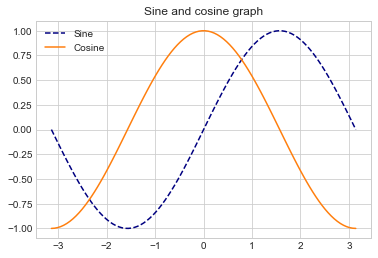

In [12]:
plt.style.use('seaborn-whitegrid')

x = np.linspace(-np.pi, np.pi, 100)

plt.plot(x, np.sin(x), linestyle='dashed', color='navy', label='Sine')
plt.plot(x, np.cos(x), color='tab:orange', label='Cosine')
plt.title('Sine and cosine graph')
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

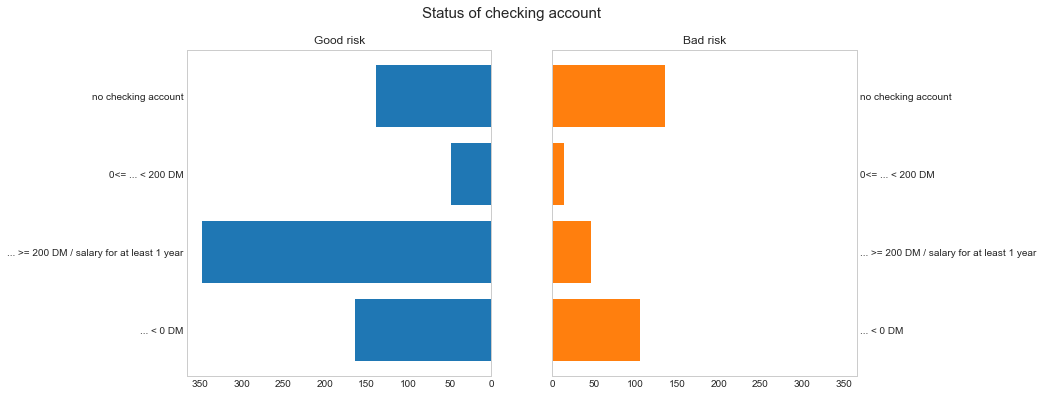

In [13]:
groupped_good = data[(data['credit_risk'] == 'good')].groupby('status')['amount'].count()
groupped_good = pd.DataFrame(groupped_good)
groupped_good.reset_index(inplace=True, drop=False)

groupped_bad = data[(data['credit_risk'] == 'bad')].groupby('status')['amount'].count()
groupped_bad = pd.DataFrame(groupped_bad)
groupped_bad.reset_index(inplace=True, drop=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].barh(y=groupped_good['status'], width=groupped_good['amount'], color='tab:blue')
axes[1].barh(y=groupped_bad['status'], width=groupped_bad['amount'], color='tab:orange')
axes[0].set(title='Good risk')
axes[1].set(title='Bad risk')
axes[0].set_xlim(axes[0].get_xlim()[::-1])
axes[1].set_xlim(axes[0].get_xlim()[::-1])
axes[0].yaxis.tick_left()
axes[1].yaxis.tick_right()
axes[0].grid(False)
axes[1].grid(False)
fig.suptitle("Status of checking account", fontsize=15)

plt.show()

##### Что видим?

Итак, очевидно, лучше всего ситуация у тех, у кого на счете есть более 200 дойче-марок. 

А отсуствие счета не дает почти никакой информации о том, вернет ли клиент кредит, или нет (максимальная энтропия). 

Также, в случае, если у клиента есть задолженность (дойче-марок меньше нуля), то он чаще возвращает, хотя соотношщение числа вернувших и не вернувших кредит примерно 2 к 1 (даже поменьше). То есть степень уверенности не слишком уж и большая. 

Те же, у кого на счете от 0 до 200 дойче-марок, возвращают довольно часто, чтобы быть уверенным, что кредит будет выплачен успешно. 


### Задание 8  (0.5 балла)

In [14]:
import seaborn as sns

In [15]:
good_bad_palette={'good': 'midnightblue', 'bad':'firebrick'}

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

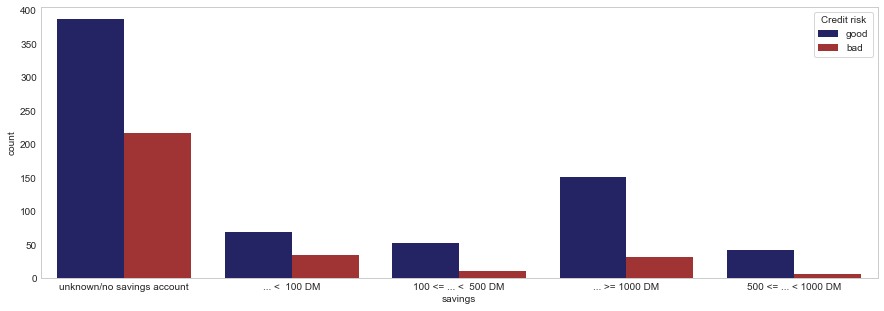

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='savings', hue='credit_risk', palette=good_bad_palette)
ax.set(xlabel='savings')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Credit risk')
plt.show()

##### Что видим?
При сбережениях от 100 до 1000+ дойчемарок у нас очень неплохое соотношение успешно уплаченных и успешно неуплаченных кредитов. При данных значениях сбережений у клиента мы можем быть уверены в том, что он вернет кредит с высокой вероятностью.
<br><br>В случае же, если у клиента нет сберегательного аккаунта / сбережения меньше 100 дойче-марок, выдавая кредит мы сильно рискуем, так как каждый третий клиент не будет возвращать кредит. 


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

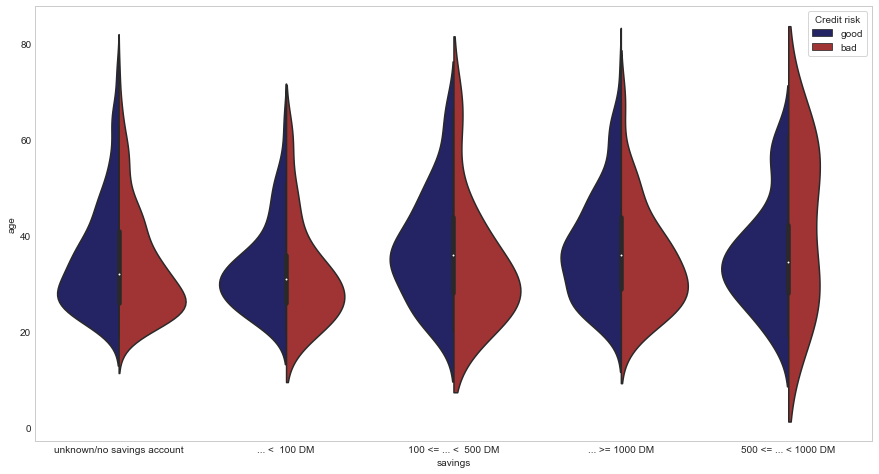

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette=good_bad_palette)
ax.set(xlabel='savings')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Credit risk')
plt.show()


###### Что видим?
Основной момент, который мы видим - чаще всего кредит берут примерно в 30 лет. 
<br><br>При этом интересно, что мода распределения возрастов тех, кто не возвращает кредит, лежит в несколько более юном возрасте, чем тех, кто кредит возвращает. 
<br><br> Самое странное - распределение возврастов тех, кто не вернул кредит при сбережениях от 500 до 1000 дойче-марок. Оно куда больше похоже на равномерно, разве что с двумя маленькими холмиками-модами.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

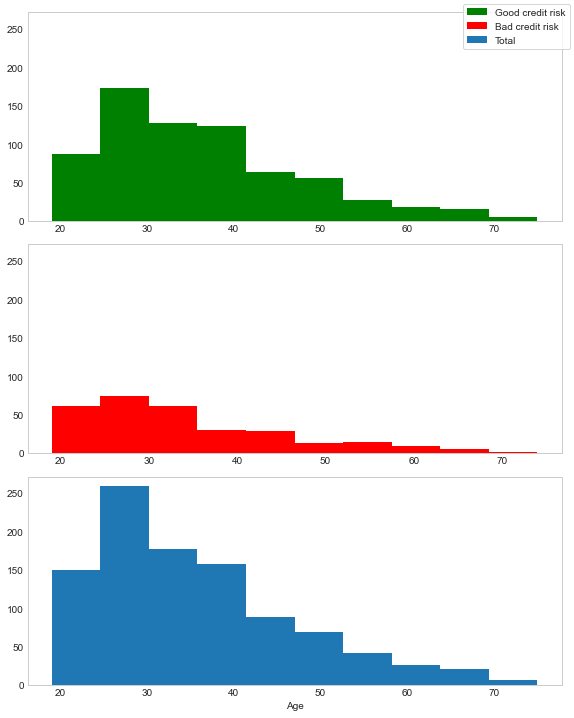

In [18]:
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(8, 10))

axs[0].hist(data[(data['credit_risk'] == 'good')]['age'], color='green', label='Good credit risk')
axs[1].hist(data[(data['credit_risk'] == 'bad')]['age'], color='red', label='Bad credit risk')
axs[2].hist(data['age'], label='Total')
for ax in axs:
    ax.grid(False)
plt.xlabel('Age')

fig.legend(loc='upper right', frameon=True)

##### Что видим?
Чаще всего кредиты берут примерно в 25-30 лет. 
<br><br>Видим, что кредитов, которые в итоге не вернули меньше (оно и логично. Иначе банк бы разорился). 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

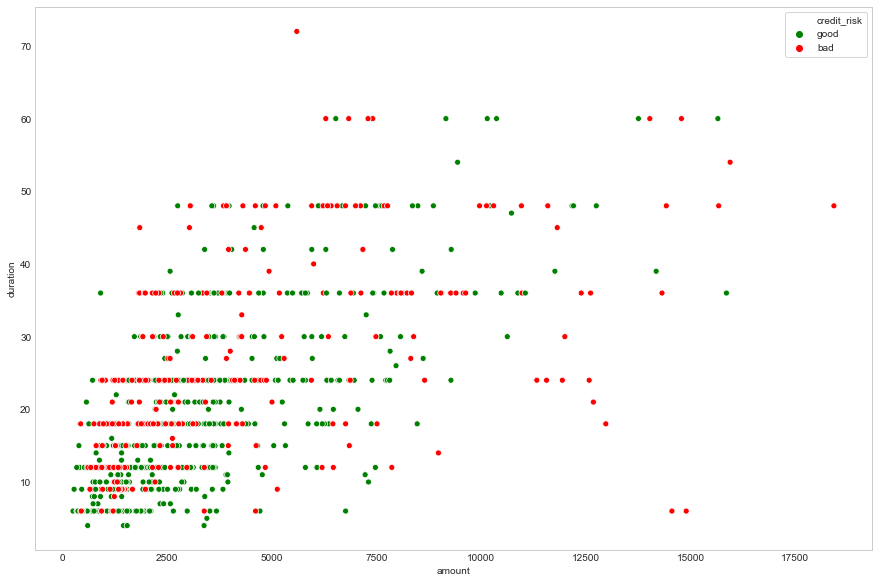

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=data['amount'], y=data['duration'], hue=data['credit_risk'], palette={'good':'green', 'bad':'red'})

ax.legend(loc='upper right', frameon=True)
ax.grid(False)

##### Что видим?
Похоже, что чем больше сумма кредита, тем на более долгий срок он берется. 
<br><br>Еще видим, что неудачные и удачные кредиты довольно сильно перемешаны в данном пространстве. Однако есть ощущение, что большинство краткосрочных (в пределах 15 месяцев) кредитов на малую сумму (до 5000 дойче-марок) являются удачными. 

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [20]:
from mpl_toolkits.mplot3d import Axes3D

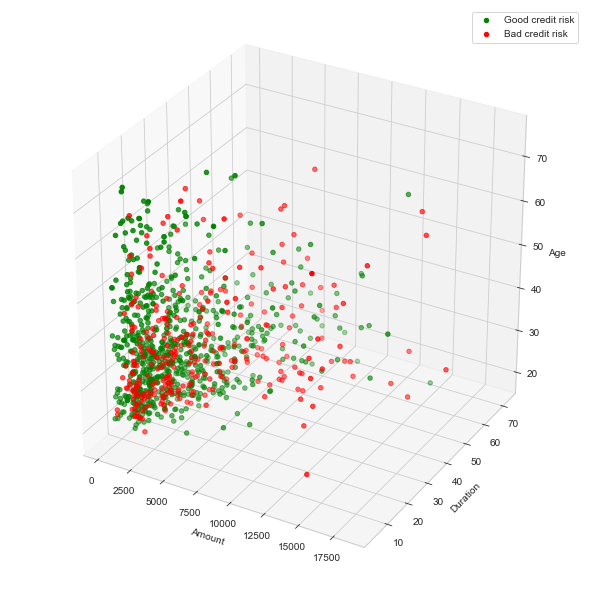

In [21]:
fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig)

x0 = data[(data['credit_risk'] == 'good')]['amount']
y0 = data[(data['credit_risk'] == 'good')]['duration']
z0 = data[(data['credit_risk'] == 'good')]['age']

x1 = data[(data['credit_risk'] == 'bad')]['amount']
y1 = data[(data['credit_risk'] == 'bad')]['duration']
z1 = data[(data['credit_risk'] == 'bad')]['age']

ax.scatter(x0, y0, z0, cmap=good_bad_palette, c='g', marker='o', label='Good credit risk')
ax.scatter(x1, y1, z1, cmap=good_bad_palette, c='r', marker='o', label='Bad credit risk')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(frameon=True)
plt.show()

Не знаю, что тут вообще можно толком увидеть, и кто реально строит такие диаграммы. Имхо, проекция 3Д точек на 2Д монитор без возможности крутить диаграмму - плохая идея. 

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [22]:
binaries = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

data['credit_risk'] = data['credit_risk'].apply(lambda x: 0 if x == 'bad' else 1)
data['people_liable'] = data['people_liable'].apply(lambda x: 0 if x == '0 to 2' else 1)
data['foreign_worker'] = data['foreign_worker'].apply(lambda x: 0 if x == 'no' else 1)
data['telephone'] = data['telephone'].apply(lambda x: 0 if x == 'no' else 1)

In [23]:
ordinals = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']

def encode_status(x):
    if x == 'no checking account':
        to_return = 0
    elif x == '... < 0 DM':
        to_return = 1
    elif x == '0<= ... < 200 DM':
        to_return = 2
    else:
        to_return = 3
    return to_return
data['status'] = data['status'].apply(lambda x: encode_status(x))

def encode_savings(x):
    if x == 'unknown/no savings account':
        to_return = 0
    elif x == '... <  100 DM':
        to_return = 1
    elif x == '100 <= ... <  500 DM':
        to_return = 2
    elif x == '500 <= ... < 1000 DM':
        to_return = 3
    else:
        to_return = 4
    return to_return
data['savings'] = data['savings'].apply(lambda x: encode_savings(x))

def encode_empdur(x):
    if x == 'unemployed':
        to_return = 0
    elif x == '< 1 yr':
        to_return = 1
    elif x == '1 <= ... < 4 yrs':
        to_return = 2
    elif x == '4 <= ... < 7 yrs':
        to_return = 3
    else:
        to_return = 4
    return to_return    
data['employment_duration'] = data['employment_duration'].apply(lambda x: encode_empdur(x))

def encode_instrate(x):
    if x == '< 20':
        to_return = 0
    elif x == '20 <= ... < 25':
        to_return = 1
    elif x == '25 <= ... < 35':
        to_return = 2
    else:
        to_return = 4
    return to_return 
data['installment_rate'] = data['installment_rate'].apply(lambda x: encode_instrate(x))

def encode_presres(x):
    if x == '< 1 yr':
        to_return = 0
    elif x == '1 <= ... < 4 yrs':
        to_return = 1
    elif x == '4 <= ... < 7 yrs':
        to_return = 2
    else:
        to_return = 4
    return to_return
data['present_residence'] = data['present_residence'].apply(lambda x: encode_presres(x))

def encode_numcred(x):
    if x == '1':
        to_return = 0
    elif x == '2-3':
        to_return = 1
    elif x == '4-5':
        to_return = 2
    else:
        to_return = 4
    return to_return    
data['number_credits'] = data['number_credits'].apply(lambda x: encode_numcred(x))

In [24]:
categorical = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']

dummies = pd.get_dummies(data[categorical])
data = pd.concat([data, dummies], axis=1)
data.drop(columns=categorical, inplace=True)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [25]:
def get_distance(a: np.array, b: np.array):
    return np.linalg.norm(a - b)

v_get_distance = np.vectorize(get_distance, signature='(n),(n)->()')

def predict(Xtest: np.array, Xtrain: np.array, ytrain: np.array, k) -> np.array:
    
    i = 0
    objs_dists = dict()  # Здесь я храню набор расстояний для каждого теста до каждого обучающего объекта
    for obj in Xtest:  # Для каждого объекта в тестовой выборке
        distances = v_get_distance(Xtrain, obj)  # Расстояния от текущ объекта в тесте до кажд объекта в обучающей
        objs_dists[i] = np.array(list(zip(distances, ytrain)))  # Храню расстояние + класс (good / bad)
        i += 1
    
    # У меня есть для каждого тестового объекта расстояния + метки. Хочу теперь найти К ближайших соседей
    
    predictions = np.array([])
    
    for i in objs_dists.keys():  # Для каждового тестового объекта найдем КНН и выберем самый часто встречающ класс
        dists = objs_dists[i]
        dists = dists[np.argsort(dists[:,0])]
        knn = dists[0:k, 1].astype('int32')
        predicted_class = np.argmax(np.bincount(knn))
        predictions = np.append(predictions, predicted_class)
    
    return predictions

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [31]:
accuracies = dict()

age_bin = 5
amount_bin = 6
duration_bin = 4
tranche_bin = 8

data_for_knn = data.copy()
data_for_knn['age_code'] = label.fit_transform(pd.cut(data['age'].astype(int), age_bin))
data_for_knn['amount_code'] = label.fit_transform(pd.cut(data['amount'].astype(int), amount_bin))
data_for_knn['duration_code'] = label.fit_transform(pd.cut(data['duration'].astype(int), duration_bin))
data_for_knn['monthly_tranche'] = data_for_knn['amount'] / data_for_knn['duration']  
# Ввели признак - сумма выплат по кредиту в месяц (без учета процентов, но все же)
data_for_knn['monthly_tranche_code'] = label.fit_transform(pd.cut(data_for_knn['monthly_tranche'].astype(float), tranche_bin))

data_for_knn.drop(columns=['age', 'amount', 'duration', 'monthly_tranche'], inplace=True)

X = data_for_knn.drop('credit_risk', 1).values
y = data_for_knn['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


for k in range(2, 25):
    key = k
#     key = str(tranche_bin) + '_' + str(k)
    accuracies[key] = accuracy_score(y_test, predict(X_test, X_train, y_train, k))


In [32]:
accuracies_arr = np.array(list(accuracies.items()))
accuracies_arr = accuracies_arr[np.argsort(accuracies_arr[:,1])]
best_accuracy = accuracies_arr[len(accuracies_arr) - 1, :]

#### Что получилось по доле верных ответов:

In [33]:
print(f'Доля верных ответов = {best_accuracy[1]} при параметре и числе соседей = {int((best_accuracy[0]))}')

Доля верных ответов = 0.784 при параметре и числе соседей = 14
